<a href="https://colab.research.google.com/github/hieu25042003/mlmed2024/blob/main/Practice_MLinMedicine1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback
from keras import regularizers

In [86]:
train_data = pd.read_csv("/content/drive/MyDrive/mitbih_train.csv",header=None)
test_data = pd.read_csv("/content/drive/MyDrive/mitbih_test.csv",header=None)

In [65]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [66]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [75]:
print(train_data[187].value_counts())

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


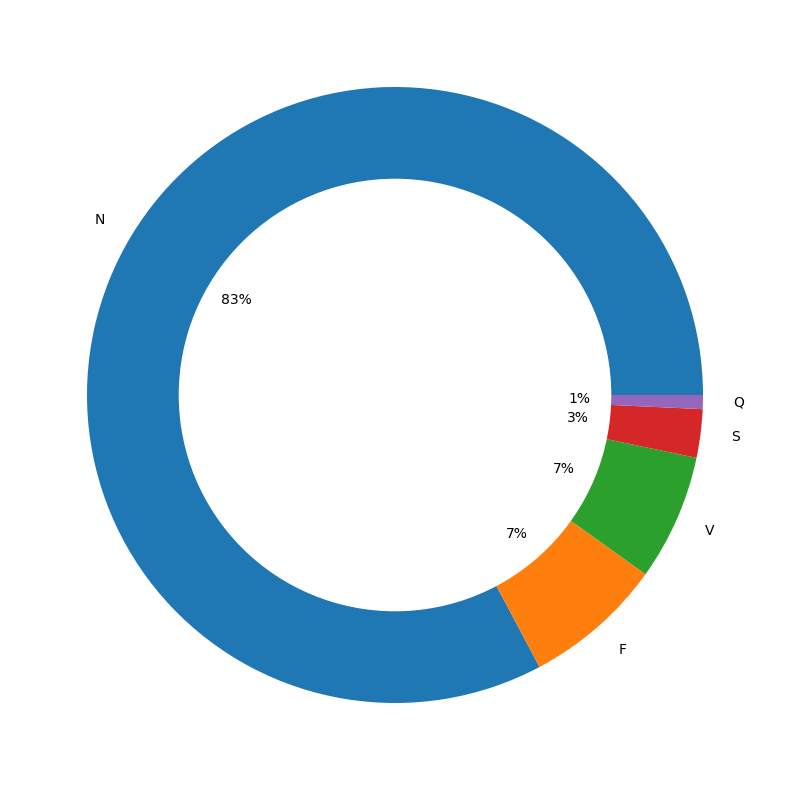

In [82]:
plt.figure(figsize= (10,10))
circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(train_data[187].value_counts(), labels=['N','F','V','S','Q'], autopct = '%0.0f%%')
plt.gcf()
plt.gca().add_artist(circle)
plt.show()

In [37]:
train_data.shape

(87553, 188)

In [32]:
len(X_train)

87553

In [33]:
len(X_test)

21891

In [55]:
X_train = train_data.iloc[67000:, :-1].values
y_train = train_data.iloc[67000:, -1].values.astype(int)
X_test = test_data.iloc[16500:, :-1].values
y_test = test_data.iloc[16500:, -1].values.astype(int)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class PrintEpochResult(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch+1}:")
        print(f"  - loss: {logs['loss']:.4f}")
        print(f"  - accuracy: {logs['accuracy']:.4f}")
        print(f"  - val_loss: {logs['val_loss']:.4f}")
        print(f"  - val_accuracy: {logs['val_accuracy']:.4f}")
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print_callback = PrintEpochResult()
result = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[print_callback])
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/50
230/257 [=========================>....] - ETA: 0s - loss: 2.3473 - accuracy: 0.5623
Epoch 1:
  - loss: 2.2806
  - accuracy: 0.5744
  - val_loss: 1.2372
  - val_accuracy: 0.8594
257/257 [==============================] - 1s 2ms/step - loss: 2.2806 - accuracy: 0.5744 - val_loss: 1.2372 - val_accuracy: 0.8594
Epoch 2/50
223/257 [=========================>....] - ETA: 0s - loss: 1.3929 - accuracy: 0.7175
Epoch 2:
  - loss: 1.3626
  - accuracy: 0.7205
  - val_loss: 0.7776
  - val_accuracy: 0.8786
257/257 [==============================] - 0s 2ms/step - loss: 1.3626 - accuracy: 0.7205 - val_loss: 0.7776 - val_accuracy: 0.8786
Epoch 3/50
233/257 [==========================>...] - ETA: 0s - loss: 1.0018 - accuracy: 0.7606
Epoch 3:
  - loss: 0.9923
  - accuracy: 0.7602
  - val_loss: 0.6145
  - val_accuracy: 0.8798
257/257 [==============================] - 0s 2ms/step - loss: 0.9923 - accuracy: 0.7602 - val_loss: 0.6145 - val_accuracy: 0.8798
Epoch 4/50
226/257 [====================

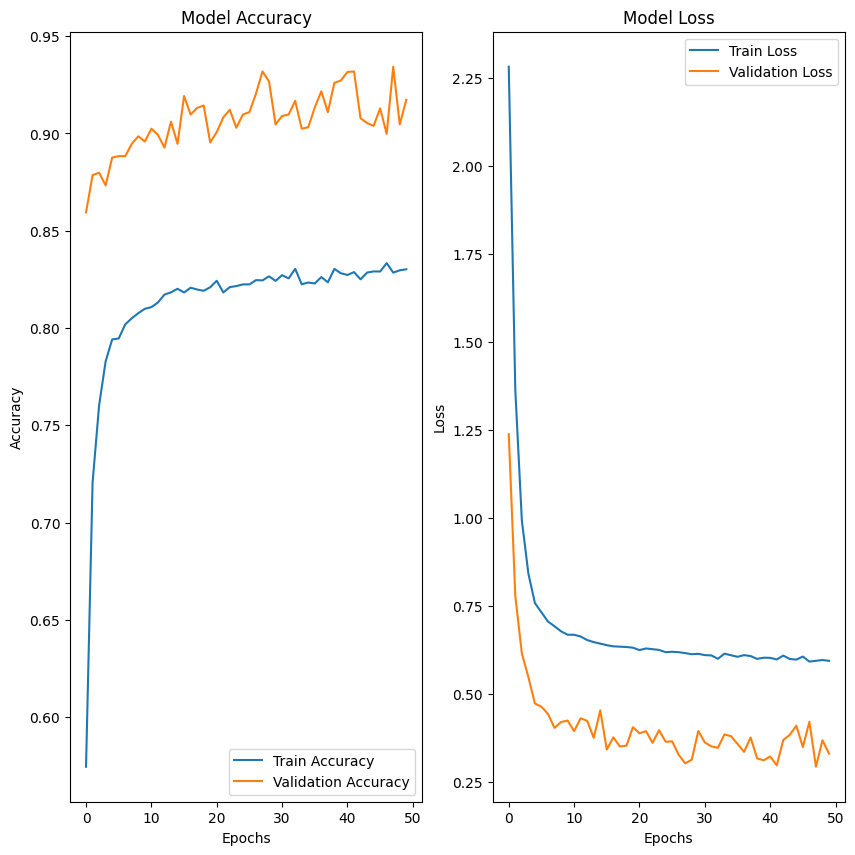

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].plot(result.history['accuracy'], label='Train Accuracy')
ax[0].plot(result.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[1].plot(result.history['loss'], label='Train Loss')
ax[1].plot(result.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()
plt.show()